## Import the necessary libraries and the dataset from the csv file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file into a DataFrame: df

real_state_data = pd.read_csv( 
  '/home/xamanek/PythonProjects/ML_Transformers_001/Datasets/20240131a_Real_Estate.csv' 
  )

In [2]:
# Display the first few rows of the dataset and the info about the dataset 
real_state_data_head = real_state_data.head()
data_info = real_state_data.info()

print(real_state_data_head )
print( data_info )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144

## This dataset contains 7 columns: 

#### 1.- Transaction date: Date of the real state transaction
#### 2.- House age: Age of the house
#### 3.- Distance to the nearest MRT station: Distance to the nearest Mass Rapid Transit station in meters
#### 4.- Number of convenience stores: Number of convenience stores in the vicinity
#### 5.- Latitude: Latitude of the property location
#### 6.- Longitude: Longitude of the property location
#### 7.- House price of unit area: House price of unit area


In [4]:
# Check if there are null values in the dataset
print( real_state_data.isnull().sum() )

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


In [5]:
# Descriptive statistics of the dataset 
descriptive_stats = real_state_data.describe()

print( descriptive_stats )

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

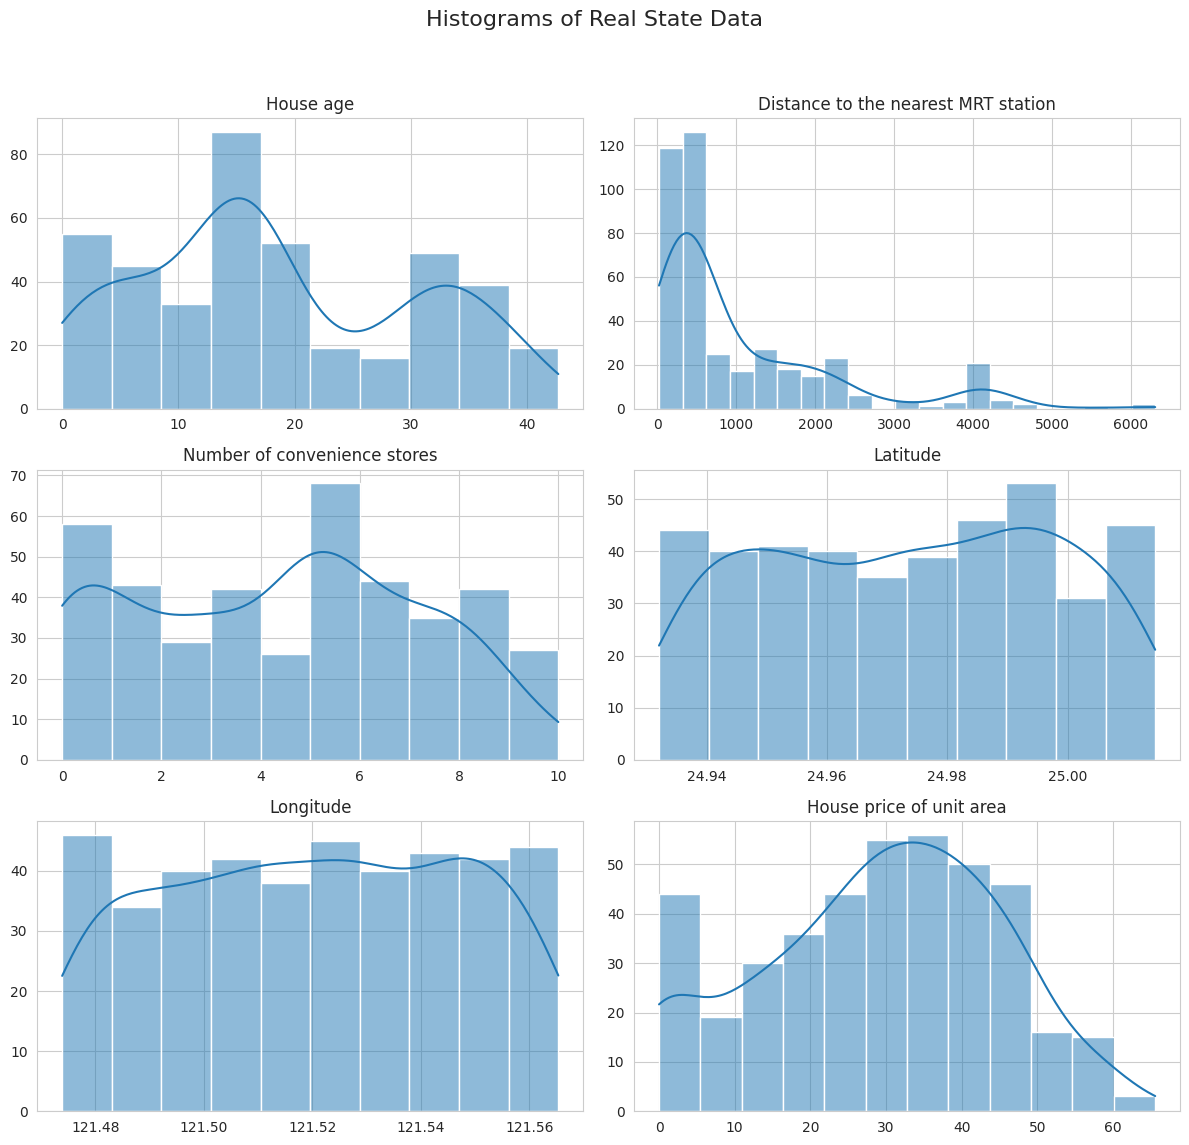

In [7]:
# Plot the histograms of all the numerical features of the dataset

# Set the aesthetic style of the plots
sns.set_style( 'whitegrid' )

# Create the histograms for the numerical columns
fig, axes = plt.subplots( nrows = 3, ncols = 2, figsize = ( 12, 12 ) )
fig.suptitle( 'Histograms of Real State Data', fontsize = 16 )

cols = [ 
  'House age', 
  'Distance to the nearest MRT station', 
  'Number of convenience stores', 
  'Latitude', 
  'Longitude', 
  'House price of unit area',
  ]

for i, col in enumerate(cols):
  sns.histplot( real_state_data[col], kde = True, ax = axes[ i//2, i%2 ] )
  axes[ i//2, i%2 ].set_title( col )
  axes[ i//2, i%2 ].set_xlabel( '' )
  axes[ i//2, i%2 ].set_ylabel( '' )

plt.tight_layout( rect = [ 0, 0.03, 1, 0.95 ] )
plt.show()

#### 1.- House age: this shows a relatively uniform distribution with a slight increase in the number of newer properties ( lower age )
#### 2.- Distance to the Nearest MRT Station: Most properties are located close to an MRT station, as indicated by the high frequency of lower distances. There's a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.
#### 3.- Number of Convenience Stores: Displays a wide range, with notable peaks at specific counts, like 0, 5 and 10. It suggest certain common configurations in terms of convenience store availability.
#### 4.- Latitude and Longitude: Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited area.
#### 5.- House Price of Unit Area: Displays a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase.

### Now, lets create scatter plots to explore the relationships between these variables and the house price.

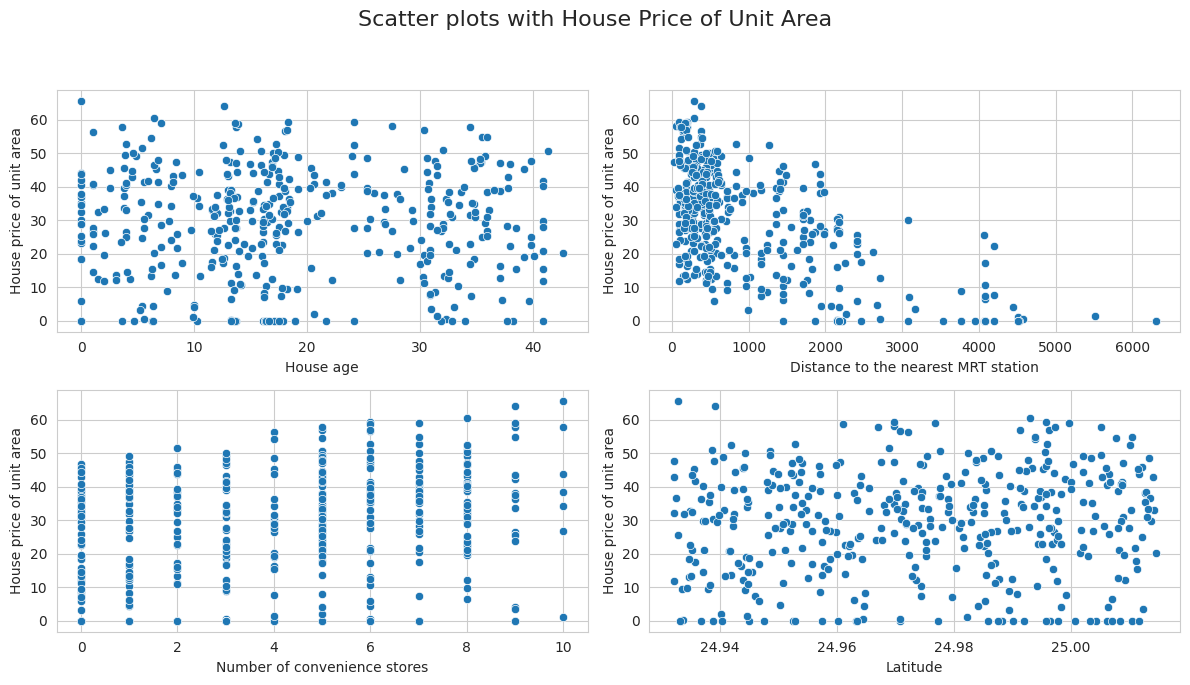

In [9]:
# Scatter plot for each variable against the house price
fig, axes = plt.subplots( nrows = 2, ncols = 2, figsize = ( 12, 10 ) )
fig.suptitle( 'Scatter plots with House Price of Unit Area', fontsize = 16 )
# Create the scatter plots for the numerical columns

sns.scatterplot( 
  data = real_state_data, 
  x = 'House age', 
  y = 'House price of unit area', 
  ax = axes[ 0, 0 ] 
)

sns.scatterplot(
  data = real_state_data, 
  x = 'Distance to the nearest MRT station', 
  y = 'House price of unit area', 
  ax = axes[ 0, 1 ] 
)

sns.scatterplot(
  data = real_state_data, 
  x = 'Number of convenience stores', 
  y = 'House price of unit area', 
  ax = axes[ 1, 0 ] 
)

sns.scatterplot(
  data = real_state_data, 
  x = 'Latitude', 
  y = 'House price of unit area', 
  ax = axes[ 1, 1 ] 
)

plt.tight_layout( rect = [ 0, 0.3, 1, 0.95 ] )
plt.show()

#### The scatter plots revealed interesting relationships between various factors and house prices:
#### 1.- House age vs House price: There doesn't seem to be a strong linear relationship between house age and price. However, it appears that very new and very old houses might have higher prices.
#### 2.- Distance to the nearest MRT station vs House price: There is a clear trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease. It suggest a strong negative relationship between these two variables.
#### 3.- Number of convenience stores vs House price: There seems to be a positive relationship between the number of convenience stores and house prices. Houses with more convenience stores in the vicinity tend to have higher prices.
#### 4.- Latitude vs House price: While not a strong linear relationship, there seems to be a pattern where certain latitudes correspond to higher or lower house prices. It could be indicative of specific neighbourhoods being more desirables.

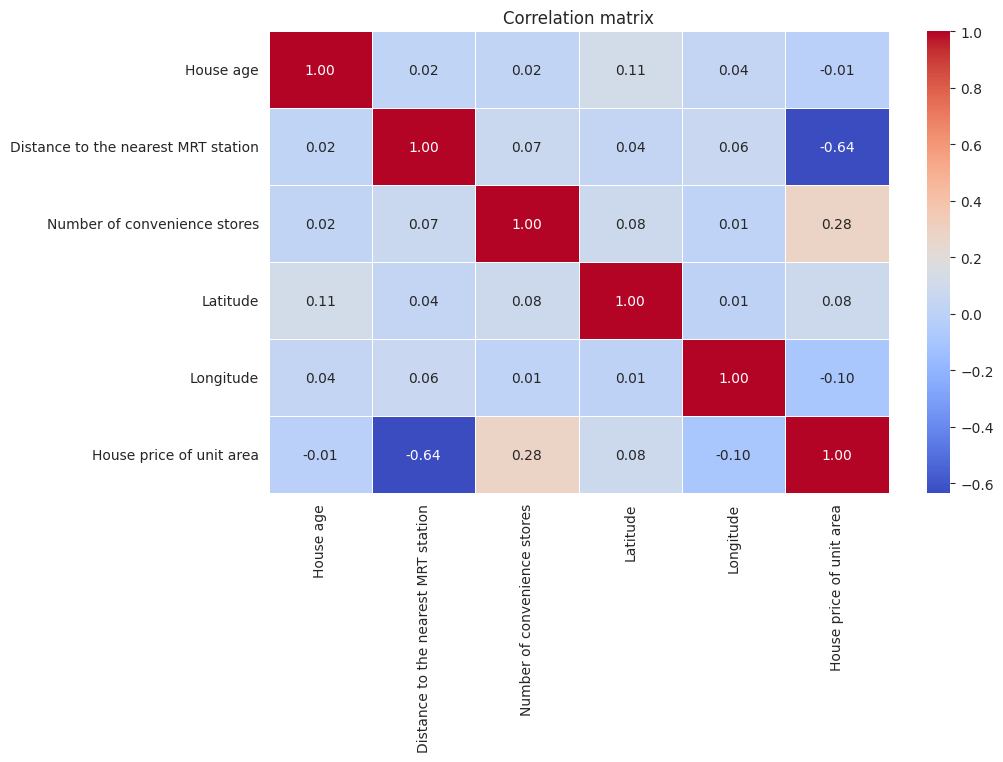

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [11]:
# Correlation analysis to quantify the relationships between these variables 
# Correlation matrix
import numpy as np

real_state_data_numeric = real_state_data.select_dtypes(include=[np.number])
correlation_matrix = real_state_data_numeric.corr()

# Plotting the correlation matrix
plt.figure( figsize = ( 10, 6 ) )
sns.heatmap( 
  correlation_matrix, 
  annot = True, 
  cmap = 'coolwarm', 
  fmt = ".2f", 
  linewidths = 0.5 
)

plt.title( 'Correlation matrix' )
plt.show()

print( correlation_matrix )